# merge()


Merging dataframes in Pandas is similar to the JOIN statement in the SQL https://www.w3schools.com/sql/sql_join.asp

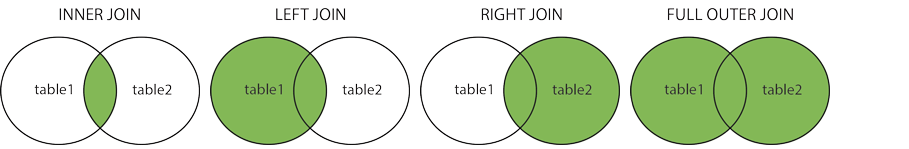

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Create two Dataframes

df1 = pd.DataFrame( {'apple': [5,4,10,20],'mango':[4,25,15,32],'grapes':[25,5,10,25]})
df2=  pd.DataFrame( {'apple': [6,4,15,20],'mango':[4,25,15,32],'grapes':[25,5,10,25]})

In [3]:
df1

,apple,grapes,mango
0,5,25,4
1,4,5,25
2,10,10,15
3,20,25,32


In [4]:
df2

,apple,grapes,mango
0,6,25,4
1,4,5,25
2,15,10,15
3,20,25,32


## merge() syntax

pd.merge(left,right how,on)


##### left-- left dataframe
##### right-- right dataframe
##### how-- type of merge (left,right, inner, outer)
##### on-- column name to use as key for merging

### Left merge

Returns all the elements from the left dataframe and matching elements from the right dataframe. The non matching elements of the right dataframe are set as NaN.

In [5]:
pd.merge(left= df1,right= df2,how='left',on='apple')

,apple,grapes_x,mango_x,grapes_y,mango_y
0,5,25,4,NaN,NaN
1,4,5,25,5.0,25.0
2,10,10,15,NaN,NaN
3,20,25,32,25.0,32.0


### Left merge with sort parameter 

In [6]:
pd.merge(df1,df2,how='left',on='apple',sort=True)

,apple,grapes_x,mango_x,grapes_y,mango_y
0,4,5,25,5.0,25.0
1,5,25,4,NaN,NaN
2,10,10,15,NaN,NaN
3,20,25,32,25.0,32.0


### Left merge with custom suffixes

By default when you merge two dataframes, the column names are suffixed with _x and _y to indicate the origin of the columns. However we can change that behavior by using the suffixes parameter to more intutiveness and better understanding.

In [7]:
pd.merge(df1,df2,how='left',on='apple',sort=True,suffixes=('_L','_r'))

,apple,grapes_L,mango_L,grapes_r,mango_r
0,4,5,25,5.0,25.0
1,5,25,4,NaN,NaN
2,10,10,15,NaN,NaN
3,20,25,32,25.0,32.0


### Right merge

Retruns all the elments from the right dataframe and only the matching elements from the left dataframe.

In [8]:
pd.merge(left= df1,right= df2,how='right',on='apple')

,apple,grapes_x,mango_x,grapes_y,mango_y
0,4,5.0,25.0,5,25
1,20,25.0,32.0,25,32
2,6,NaN,NaN,25,4
3,15,NaN,NaN,10,15


### Inner merge

Returns only the matching elements from both the left and right data frames.


In [9]:
pd.merge(left= df1,right= df2,how='inner',on='apple')

,apple,grapes_x,mango_x,grapes_y,mango_y
0,4,5,25,5,25
1,20,25,32,25,32


### Outer merge

Returns all the elements from both left and right dataframes. 

In [10]:
pd.merge(left=df1,right=df2,how='outer',on='apple')

,apple,grapes_x,mango_x,grapes_y,mango_y
0,5,25.0,4.0,NaN,NaN
1,4,5.0,25.0,5.0,25.0
2,10,10.0,15.0,NaN,NaN
3,20,25.0,32.0,25.0,32.0
4,6,NaN,NaN,25.0,4.0
5,15,NaN,NaN,10.0,15.0
